# Importing Libraries:

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mat

# Loading the Dataset:

In [41]:
data = pd.read_csv("C:\\Users\\dk957\\Downloads\\imdb_data.csv")

In [42]:
# Reviewing all column names:

data.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [43]:
# Setting up to show all the columns:

pd.set_option("display.max_columns",None)

In [44]:
# Removing all not_required columns from the dataframe:

data = data[['id',
 'budget',
 'genres',
 'original_language',
 'original_title',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'runtime',
 'status',
 'title',
 'cast',
 'crew',
 'revenue']]

In [45]:
# Checking the count of null values for each column:

data.isna().sum()

id                        0
budget                    0
genres                    7
original_language         0
original_title            0
popularity                0
production_companies    156
production_countries     55
release_date              0
runtime                   2
status                    0
title                     0
cast                     13
crew                     16
revenue                   0
dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3000 non-null   int64  
 1   budget                3000 non-null   int64  
 2   genres                2993 non-null   object 
 3   original_language     3000 non-null   object 
 4   original_title        3000 non-null   object 
 5   popularity            3000 non-null   float64
 6   production_companies  2844 non-null   object 
 7   production_countries  2945 non-null   object 
 8   release_date          3000 non-null   object 
 9   runtime               2998 non-null   float64
 10  status                3000 non-null   object 
 11  title                 3000 non-null   object 
 12  cast                  2987 non-null   object 
 13  crew                  2984 non-null   object 
 14  revenue               3000 non-null   int64  
dtypes: float64(2), int64(

## Visualizing null values of each column using Heatmap

<AxesSubplot:>

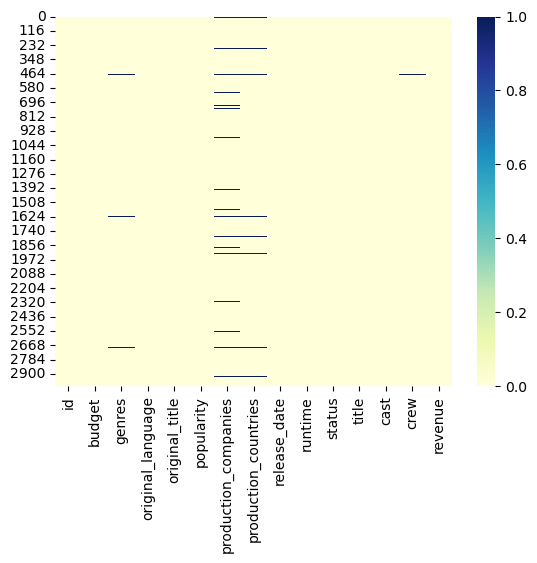

In [47]:
sns.heatmap(data.isna(), cmap='YlGnBu')

In [48]:
# Creating variable to check correlation among different columns:

corr = data.corr()

corr

,id,budget,popularity,runtime,revenue
id,1.000000,0.019732,-0.007470,0.010750,0.000610
budget,0.019732,1.000000,0.342356,0.238373,0.752965
popularity,-0.007470,0.342356,1.000000,0.133690,0.461460
runtime,0.010750,0.238373,0.133690,1.000000,0.216380
revenue,0.000610,0.752965,0.461460,0.216380,1.000000


## Visualizing the correlation using Heatmap

<AxesSubplot:>

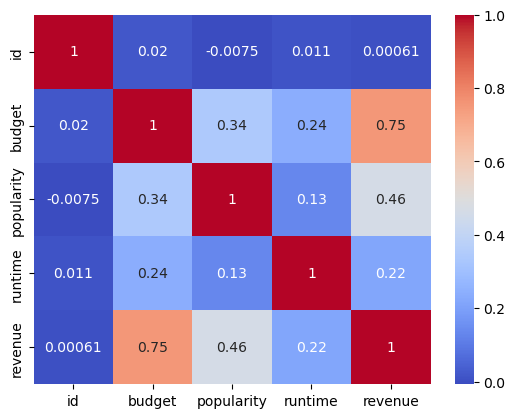

In [50]:
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [53]:
data.head(1)

,id,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,status,title,cast,crew,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [52]:
# Replacing all null values of genres columns with "0"

data["genres"].fillna("0",inplace=True)

In [57]:
# Creating a function which evaluats a string and returns the value of corresponding ID key:

def extract_genre_id(string):
    
    x = eval(string)
    
    if x!=0:
        return x[0]['id']
    else:
        return 0

In [58]:
# Creating a function which evaluats a string and returns the value of corresponding name key:

def extract_genre_name(string):
    
    x = eval(string)
    
    if x!=0:
        return x[0]['name']
    else:
        return 0

In [59]:
# Adding a new column which contains the genre IDs:

data["genre_id"] = data["genres"].apply(extract_genre_id)

In [60]:
# Adding a new column which contains the genre name:

data["genre"] = data.apply(lambda x: extract_genre_name(x["genres"]),axis=1)

In [61]:
# Removing not required column "genres" as extracted all the required information in seperate columns:

data = data.drop(["genres"],axis=1)

In [62]:
data.head(1)

,id,budget,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,status,title,cast,crew,revenue,genre_id,genre
0,1,14000000,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,35,Comedy


In [63]:
#Replacing all null values in "production_countries" with "0":

data["production_countries"].fillna("0",inplace=True)

# Creating a function which extracts the country name from the "production_countries":


def extract_country(string):
    x = eval(string)
    
    if x!=0:
        return x[0]["name"]
    else:
        return 0

In [64]:
# creating a new column which will containt the country name of the movie:

data["country"] = data["production_countries"].apply(extract_country)

In [65]:
#removing not required production_countries column:

data.drop(["production_countries"],inplace=True,axis=1)

In [66]:
data.head(2)

,id,budget,original_language,original_title,popularity,production_companies,release_date,runtime,status,title,cast,crew,revenue,genre_id,genre,country
0,1,14000000,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,35,Comedy,United States of America
1,2,40000000,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,35,Comedy,United States of America


In [67]:
# Replacing the null values of "cast" columns with "0":

data["cast"].fillna("0",inplace=True)

In [68]:
# creating a function which will extract the actor name from the cast column values and create a list of them:

def extract_actor(string):
    
    x = eval(string)
    empty = []
    
    if x!=0:
        for item in x:
            empty.append(item["name"])
            
    else:
        empty.append(x)
        
    return empty

In [69]:
# creating a new column which will contain a list of all the actors in the movie:

data["actor"] = data["cast"].apply(extract_actor)

In [70]:
#replacing the null values of crew column with "0":

data["crew"].fillna("0",inplace=True)

In [71]:
# Creating a function which extracts the director names from crew column and put it into a list:

def extract_director(string):
    
    x = eval(string)
    empty=[]
    
    if x!=0:
        for item in x:
            if item["job"]=="Director":
                empty.append(item["name"])
            else:
                pass
            
    else:
        empty.append(x)
        
    return empty
            

In [72]:
# Creating a new column which will contain list of directors of the movie:

data["director"] = data["crew"].apply(extract_director)

In [73]:
# Creating a function which extracts the producer names from crew column and put it into a list:

def extract_producer(string):
    
    x = eval(string)
    empty=[]
    
    if x!=0:
        for item in x:
            if item["job"]=="Producer":
                empty.append(item["name"])
            else:
                pass
            
    else:
        empty.append(x)
        
    return empty

In [74]:
# Creating a new column which will contain list of producers of the movie:

data["producer"] = data["crew"].apply(extract_producer)

In [75]:
new_data = data[["budget","original_language","original_title","popularity","production_companies","release_date","runtime","status","title","revenue","genre","country","actor","director","producer"]]

In [76]:
new_data.head(2)

,budget,original_language,original_title,popularity,production_companies,release_date,runtime,status,title,revenue,genre,country,actor,director,producer
0,14000000,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Released,Hot Tub Time Machine 2,12314651,Comedy,United States of America,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Steve Pink],[Andrew Panay]
1,40000000,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,Released,The Princess Diaries 2: Royal Engagement,95149435,Comedy,United States of America,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin..."


In [77]:
#creating a new column budget:

new_data["profit"] = new_data["budget"] - new_data["revenue"]

C:\Users\dk957\AppData\Local\Temp\ipykernel_16536\1942889128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["profit"] = new_data["budget"] - new_data["revenue"]


In [78]:
new_data.head(2)

,budget,original_language,original_title,popularity,production_companies,release_date,runtime,status,title,revenue,genre,country,actor,director,producer,profit
0,14000000,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Released,Hot Tub Time Machine 2,12314651,Comedy,United States of America,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Steve Pink],[Andrew Panay],1685349
1,40000000,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,Released,The Princess Diaries 2: Royal Engagement,95149435,Comedy,United States of America,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin...",-55149435


In [79]:
# Checking the movie count of each country:

new_data["country"].value_counts().reset_index().head(10)

,index,country
0,United States of America,1818
1,United Kingdom,234
2,France,147
3,Canada,97
4,Germany,90
5,India,78
6,0,55
7,Australia,52
8,Japan,50
9,Russia,47


In [80]:
# replacing all the "0" values with "United States of America" as it has most number of movies count:

new_data["country"].replace(0,"United States of America",inplace=True)

C:\Users\dk957\AppData\Local\Temp\ipykernel_16536\1066862219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["country"].replace(0,"United States of America",inplace=True)


In [81]:
country_count = new_data["country"].value_counts().reset_index().rename(columns={"index":"country","country":"count"}).head(10)

country_count

,country,count
0,United States of America,1873
1,United Kingdom,234
2,France,147
3,Canada,97
4,Germany,90
5,India,78
6,Australia,52
7,Japan,50
8,Russia,47
9,Italy,36


## Visualizing the Country count

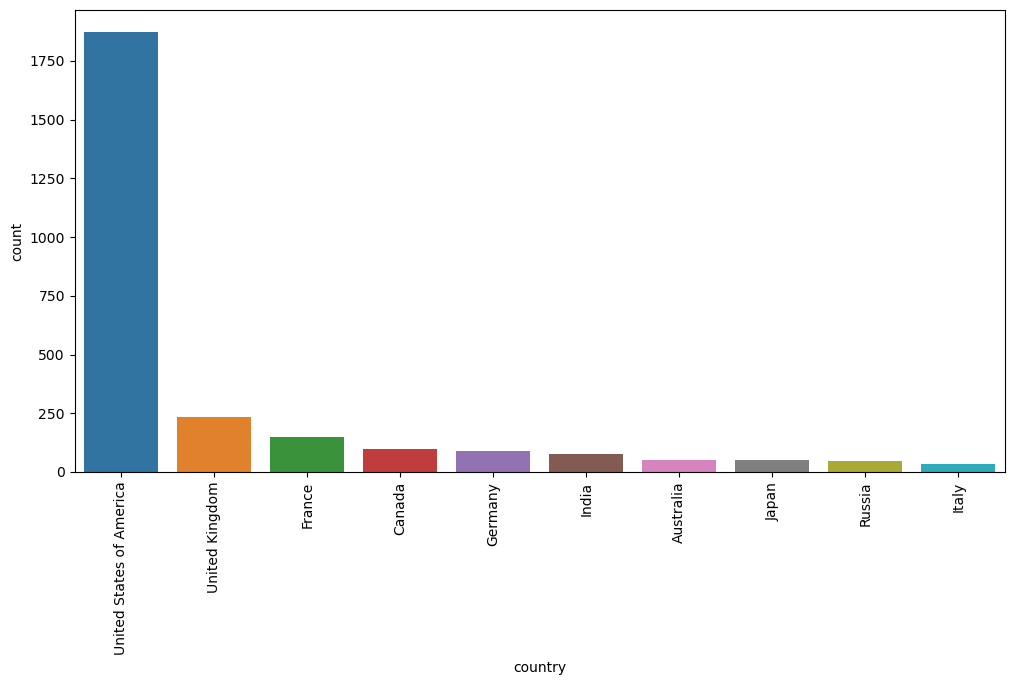

In [84]:
#Restting the plot size:
mat.rcParams['figure.figsize'] = (12,6)

sns.barplot(x=country_count["country"],y=country_count["count"],data=country_count)
plt.xticks(rotation=90)
plt.show()

Observation:
1. Most number of movies are produced from USA

In [85]:
new_data.head(2)

,budget,original_language,original_title,popularity,production_companies,release_date,runtime,status,title,revenue,genre,country,actor,director,producer,profit
0,14000000,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Released,Hot Tub Time Machine 2,12314651,Comedy,United States of America,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Steve Pink],[Andrew Panay],1685349
1,40000000,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,Released,The Princess Diaries 2: Royal Engagement,95149435,Comedy,United States of America,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin...",-55149435


In [86]:
# Grouping data to find out the average budget of movies produced by each country:

country_mean_budget = new_data.groupby("country")["budget"].mean().reset_index().rename(columns={"budget":"average_budget"}).sort_values(["average_budget"],ascending=False)

country_mean_budget.head(10)

,country,average_budget
59,Uruguay,1.350000e+08
37,New Zealand,9.025385e+07
13,Czech Republic,7.650000e+07
22,Iceland,5.500000e+07
31,Malta,5.000000e+07
52,Switzerland,4.900000e+07
18,Germany,3.695837e+07
7,Bulgaria,3.250000e+07
1,Australia,3.165968e+07
10,Canada,2.862376e+07


## # Visualizing the average budget of each country:

([<matplotlib.patches.Wedge at 0x2294b2ed9d0>,
 [Text(0.8238093706729045, 0.7289294347133426, 'Uruguay'),
  Text(-0.3897829003261099, 1.0286249513857644, 'New Zealand'),
  Text(-1.0462744452095096, 0.3395729454793663, 'Czech Republic'),
  Text(-1.0166621665126006, -0.41999766568625757, 'Iceland'),
  Text(-0.635227153269036, -0.8980459140543522, 'Malta'),
  Text(-0.09276666306829638, -1.0960813593083194, 'Switzerland'),
  Text(0.40473434531222596, -1.0228343510679938, 'Germany'),
  Text(0.7493884771305606, -0.8052433857809325, 'Bulgaria'),
  Text(0.9771889649802835, -0.5050759613372651, 'Australia'),
  Text(1.0870516099063006, -0.16828189861099277, 'Canada')],
 [Text(0.4493505658215842, 0.397597873480005, '23.06%'),
  Text(-0.21260885472333266, 0.5610681553013259, '15.41%'),
  Text(-0.5706951519324598, 0.18522160662510886, '13.07%'),
  Text(-0.5545429999159639, -0.2290896358288677, '9.39%'),
  Text(-0.3464875381467469, -0.48984322584782836, '8.54%'),
  Text(-0.05059999803725256, -0.5978

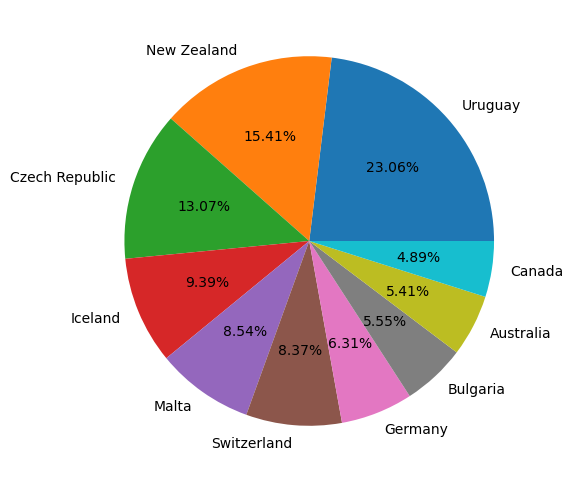

In [87]:
plt.pie(x = country_mean_budget["average_budget"][:10],labels=country_mean_budget["country"][:10],autopct='%.2f%%')

Observation:
1. Top 3 countries having highest mean budgets are Uruguay(23.06%), New Zealand(15.41%), Czech Republic(13.07%)

In [88]:
new_data.head(2)

,budget,original_language,original_title,popularity,production_companies,release_date,runtime,status,title,revenue,genre,country,actor,director,producer,profit
0,14000000,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Released,Hot Tub Time Machine 2,12314651,Comedy,United States of America,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Steve Pink],[Andrew Panay],1685349
1,40000000,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,Released,The Princess Diaries 2: Royal Engagement,95149435,Comedy,United States of America,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin...",-55149435


In [89]:
#Finding the movies' genre count:

genre_count = new_data["genre"].value_counts().reset_index().rename(columns={"index":"genre","genre":"count"})

genre_count

,genre,count
0,Drama,785
1,Comedy,604
2,Action,520
3,Adventure,187
4,Horror,170
5,Crime,147
6,Thriller,116
7,Animation,76
8,Documentary,71
9,Fantasy,68


In [90]:
# Replacing genre value 0 to "Drama" as it has highest count:

new_data["genre"].replace(0,"Drama",inplace=True)

C:\Users\dk957\AppData\Local\Temp\ipykernel_16536\792303806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["genre"].replace(0,"Drama",inplace=True)


## Visualizing the movies count according to their genre

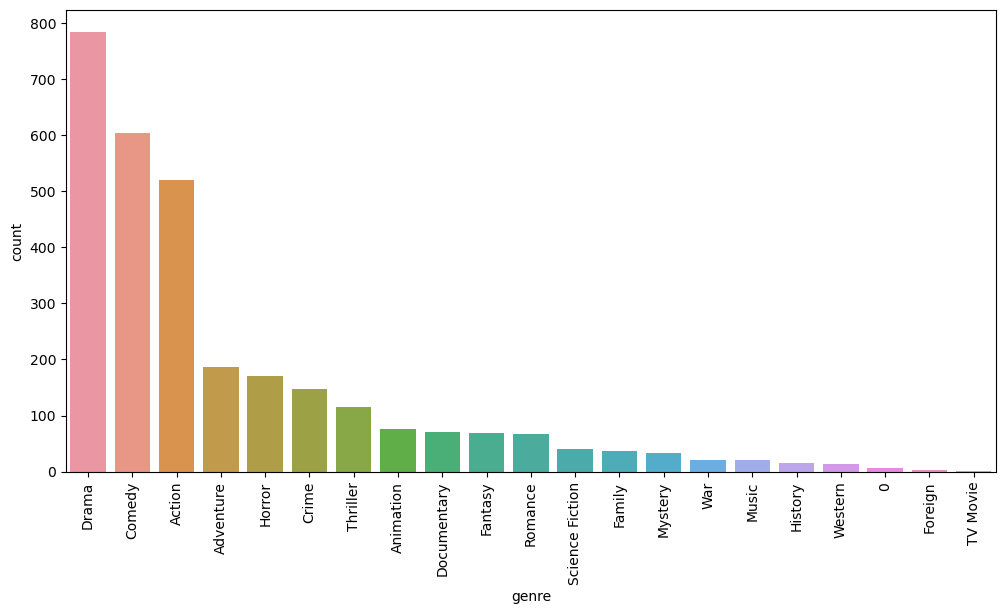

In [91]:
sns.barplot(x=genre_count["genre"],y=genre_count["count"],data=genre_count)

plt.xticks(rotation=90)
plt.show()

Observation:
1. Top 3 genres with highest movies counts are "Drama", "Comedy" and "Action"

In [92]:
genre_mean = new_data.groupby("genre")["profit"].mean().reset_index().rename(columns={"profit":"average_profit"}).sort_values(["average_profit"],ascending=False)

genre_mean

,genre,average_profit
9,Foreign,-2.815000e+04
18,War,-5.906971e+05
5,Documentary,-2.966946e+06
12,Music,-1.680038e+07
4,Crime,-2.278390e+07
6,Drama,-2.311466e+07
10,History,-2.884269e+07
3,Comedy,-3.363380e+07
13,Mystery,-3.388168e+07
17,Thriller,-3.478208e+07


## Visualizing the Average Profits per genre

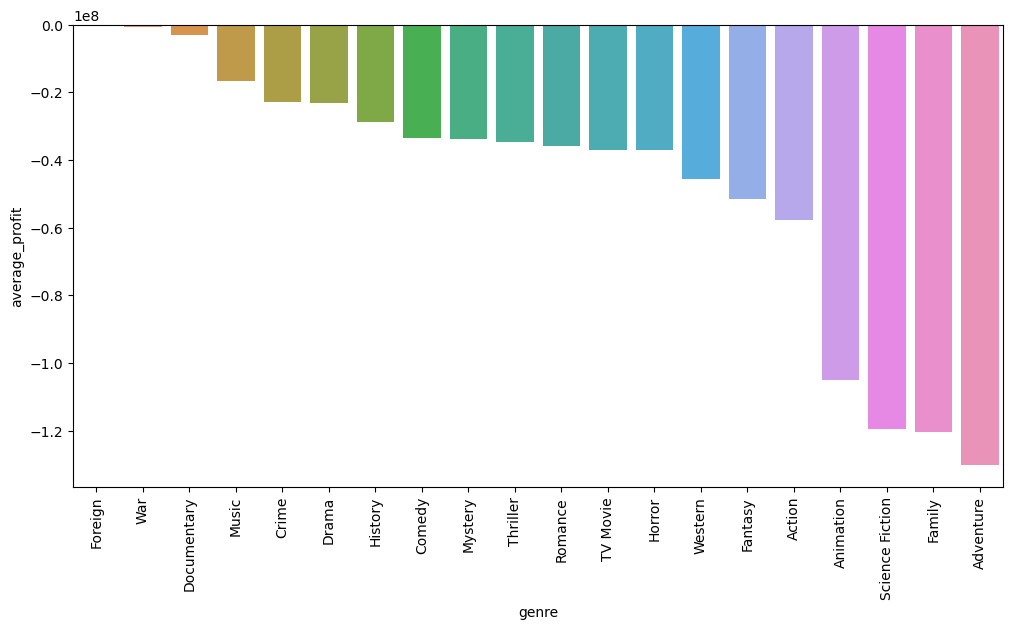

In [93]:
sns.barplot(x=genre_mean["genre"],y=genre_mean["average_profit"],data=genre_mean)

plt.xticks(rotation=90)
plt.show()

Observation:
1. All genres have loss wherein adventure movies are in least loss.

In [95]:
adventure_country = new_data[new_data["genre"]=="Adventure"].groupby("country").size().reset_index().rename(columns={0:"count of adventure movies"}).sort_values(["count of adventure movies"],ascending=False)

adventure_country

,country,count of adventure movies
19,United States of America,101
18,United Kingdom,23
6,France,9
3,Canada,8
14,New Zealand,8
12,Japan,7
0,Australia,7
11,Italy,4
7,Germany,3
4,China,3


## Visualizing the Top 10 countries which have produced least loss genre movies

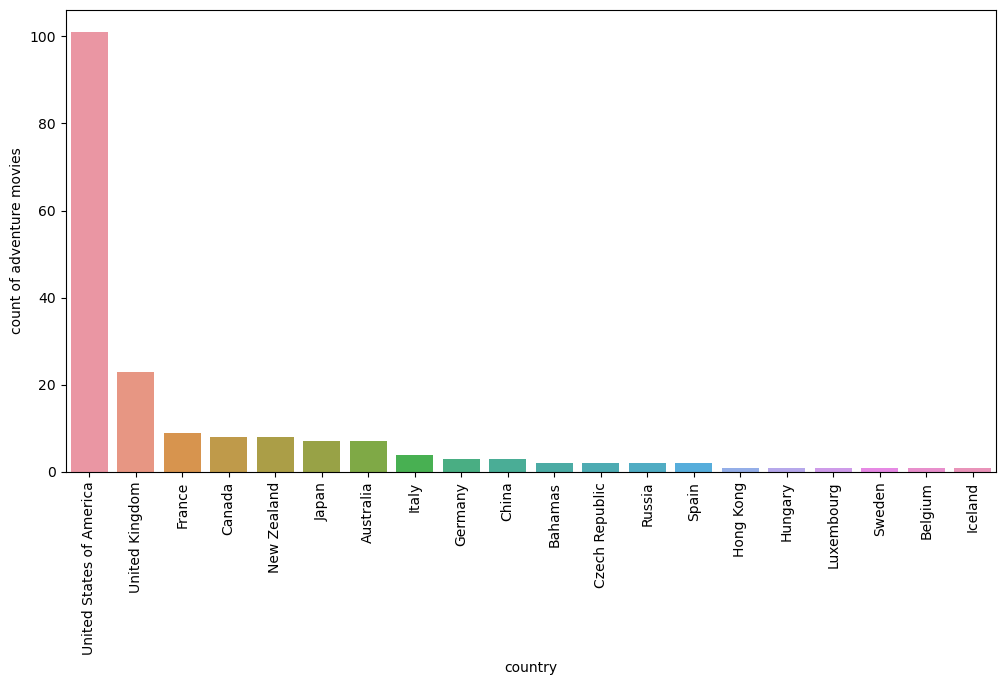

In [96]:
sns.barplot(x=adventure_country["country"],y=adventure_country["count of adventure movies"],data=adventure_country)

plt.xticks(rotation=90)
plt.show()

Observation:

United States of America has product the most movies which has least loss

In [97]:
new_data.head(2)

,budget,original_language,original_title,popularity,production_companies,release_date,runtime,status,title,revenue,genre,country,actor,director,producer,profit
0,14000000,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Released,Hot Tub Time Machine 2,12314651,Comedy,United States of America,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Steve Pink],[Andrew Panay],1685349
1,40000000,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,Released,The Princess Diaries 2: Royal Engagement,95149435,Comedy,United States of America,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin...",-55149435


In [98]:
# Finding which genre has most average popularity:

genre_popularity = new_data.groupby("genre")["popularity"].mean().reset_index().sort_values(["popularity"],ascending=False)

genre_popularity

,genre,popularity
7,Family,16.439872
13,Mystery,13.540645
15,Science Fiction,11.813102
1,Adventure,10.824906
0,Action,10.395171
17,Thriller,9.709997
2,Animation,9.323898
11,Horror,9.277572
19,Western,8.414820
4,Crime,8.271424


## Visualizing popularity of all genres

C:\Users\dk957\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


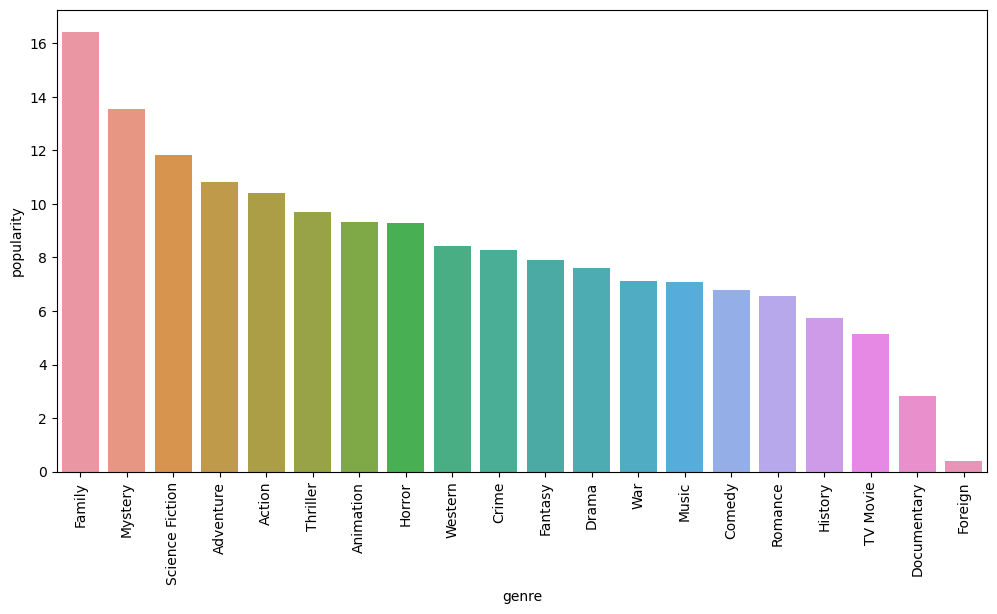

In [99]:
sns.barplot(genre_popularity["genre"],genre_popularity["popularity"],data=genre_popularity)

plt.xticks(rotation=90)
plt.show()

Observation:
1. Family genre movies have most mean popularity among audience.
2. Foreign genre movies have least mean popularity among audience.

In [100]:
new_data.head(2)

,budget,original_language,original_title,popularity,production_companies,release_date,runtime,status,title,revenue,genre,country,actor,director,producer,profit
0,14000000,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Released,Hot Tub Time Machine 2,12314651,Comedy,United States of America,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Steve Pink],[Andrew Panay],1685349
1,40000000,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,Released,The Princess Diaries 2: Royal Engagement,95149435,Comedy,United States of America,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin...",-55149435


In [101]:
language_count = new_data.groupby(["original_language"]).size().reset_index().rename(columns={0:"count"}).sort_values(["count"],ascending=False)

language_count.head(10)

,original_language,count
7,en,2575
11,fr,78
27,ru,47
8,es,43
13,hi,42
17,ja,37
16,it,24
18,ko,20
2,cn,20
35,zh,19


## Visualizing Top 5 language count of movies

([<matplotlib.patches.Wedge at 0x2294c493b20>,
 [Text(-1.0692801901773985, 0.258147002489254, 'en'),
  Text(1.0191517202817424, -0.4139200056131199, 'fr'),
  Text(1.0672084917458327, -0.2665821358335645, 'ru'),
  Text(1.0887312493754249, -0.15704861232569484, 'es'),
  Text(1.098765682413541, -0.05209582661121333, 'hi')],
 [Text(-0.5832437400967627, 0.14080745590322943, '92.46%'),
  Text(0.5559009383354958, -0.22577454851624718, '2.80%'),
  Text(0.5821137227704541, -0.1454084377273988, '1.69%'),
  Text(0.5938534087502317, -0.085662879450379, '1.54%'),
  Text(0.5993267358619314, -0.028415905424298175, '1.51%')])

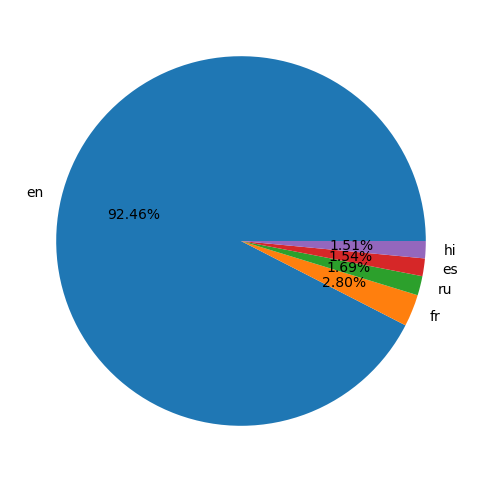

In [102]:
plt.pie(x=language_count["count"][:5],labels=language_count["original_language"][:5],autopct='%.2f%%')

Observation:
1. English language has the highest count (92.46%)

In [103]:
new_data.head()

,budget,original_language,original_title,popularity,production_companies,release_date,runtime,status,title,revenue,genre,country,actor,director,producer,profit
0,14000000,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Released,Hot Tub Time Machine 2,12314651,Comedy,United States of America,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Steve Pink],[Andrew Panay],1685349
1,40000000,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,Released,The Princess Diaries 2: Royal Engagement,95149435,Comedy,United States of America,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin...",-55149435
2,3300000,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",10/10/14,105.0,Released,Whiplash,13092000,Drama,United States of America,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",[Damien Chazelle],"[David Lancaster, Michel Litvak, Jason Blum, H...",-9792000
3,1200000,hi,Kahaani,3.174936,NaN,3/9/12,122.0,Released,Kahaani,16000000,Thriller,India,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",[Sujoy Ghosh],[Sujoy Ghosh],-14800000
4,0,ko,마린보이,1.148070,NaN,2/5/09,118.0,Released,Marine Boy,3923970,Action,South Korea,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",[Jong-seok Yoon],[],-3923970


## Creating a new dataframe to find out insights related to actors:

In [173]:
actor_data = new_data[["budget","original_language","original_title","popularity","production_companies","release_date","runtime","status","title","revenue","genre","country","actor","director","producer","profit"]]

In [121]:
actor_data.head(2)

,budget,original_language,original_title,popularity,production_companies,release_date,runtime,status,title,revenue,genre,country,actor,director,producer,profit
0,14000000,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Released,Hot Tub Time Machine 2,12314651,Comedy,United States of America,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Steve Pink],[Andrew Panay],1685349
1,40000000,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,Released,The Princess Diaries 2: Royal Engagement,95149435,Comedy,United States of America,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin...",-55149435


In [175]:
actor_data = actor_data.explode(["actor"])

actor_data.head(2)

,budget,original_language,original_title,popularity,production_companies,release_date,runtime,status,title,revenue,genre,country,actor,director,producer,profit
0,14000000,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Released,Hot Tub Time Machine 2,12314651,Comedy,United States of America,Rob Corddry,[Steve Pink],[Andrew Panay],1685349
0,14000000,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Released,Hot Tub Time Machine 2,12314651,Comedy,United States of America,Craig Robinson,[Steve Pink],[Andrew Panay],1685349


In [180]:
# Finding the mean profit of the movies of individual actors:

actor_profit = actor_data.groupby("actor")["profit"].mean().reset_index().sort_values(["profit"],ascending=False)

actor_profit.head(10)

,actor,profit
14004,Heidi Kramer,92896027.0
1261,Alissa Kramer,92896027.0
6288,Chris Johnston,87982678.0
35515,Thomas Lockyer,87982678.0
17266,Jimmie F. Skaggs,87982678.0
21158,Kwame Kwei-Armah,87982678.0
29811,Ramon Tikaram,87982678.0
24356,Mary Peach,87982678.0
6641,Christopher Halliday,87982678.0
31371,Roger Booth,87982678.0


## Creating a visual for top 10 successful actors:

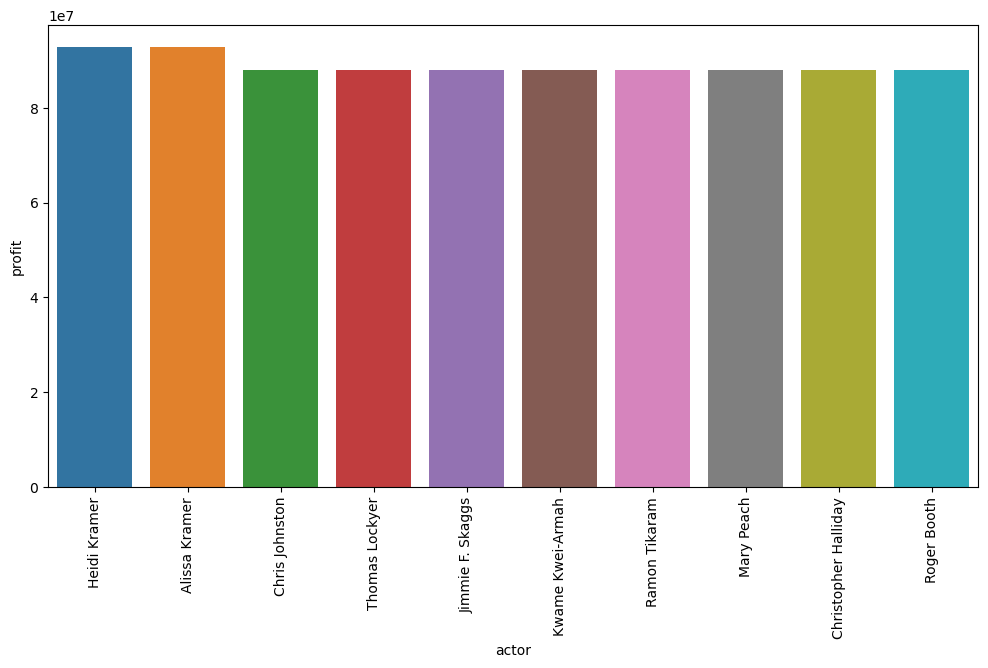

In [198]:
sns.barplot(x=actor_profit["actor"][:10],y=actor_profit["profit"][:10],data=actor_profit)

plt.xticks(rotation=90)

plt.show()

Observation:
1. Heidi Kramer and Alissa Kramer are top 2 actors in terms of mean profit.

## Creating a new dataframe to find out insights related to actors:

In [193]:
director_data = new_data[["budget","original_language","original_title","popularity","production_companies","release_date","runtime","status","title","revenue","genre","country","actor","director","producer","profit"]]

In [194]:
director_data.head(2)

,budget,original_language,original_title,popularity,production_companies,release_date,runtime,status,title,revenue,genre,country,actor,director,producer,profit
0,14000000,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Released,Hot Tub Time Machine 2,12314651,Comedy,United States of America,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Steve Pink],[Andrew Panay],1685349
1,40000000,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,Released,The Princess Diaries 2: Royal Engagement,95149435,Comedy,United States of America,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin...",-55149435


In [196]:
director_data = director_data.explode(["director"])

director_data.head(2)

,budget,original_language,original_title,popularity,production_companies,release_date,runtime,status,title,revenue,genre,country,actor,director,producer,profit
0,14000000,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Released,Hot Tub Time Machine 2,12314651,Comedy,United States of America,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",Steve Pink,[Andrew Panay],1685349
1,40000000,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,Released,The Princess Diaries 2: Royal Engagement,95149435,Comedy,United States of America,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",Garry Marshall,"[Whitney Houston, Mario Iscovich, Debra Martin...",-55149435


In [197]:
# Finding the mean profit of the movies of individual directors:

director_data = director_data.groupby("director")["profit"].mean().reset_index().sort_values(["profit"],ascending=False)

director_data.head(10)

,director,profit
177,Baz Luhrmann,80445998.0
794,James L. Brooks,71331093.0
925,John Bruno,60989310.0
747,Hugh Johnson,58736034.0
135,Antony Hoffman,46536031.0
1602,Robert Butler,43533912.0
770,Jack Sholder,43496675.0
639,George Armitage,43191450.0
1661,Ronald F. Maxwell,43076064.0
1931,Tony Bill,42200000.0


## Creating a visual for top 10 successful actors:

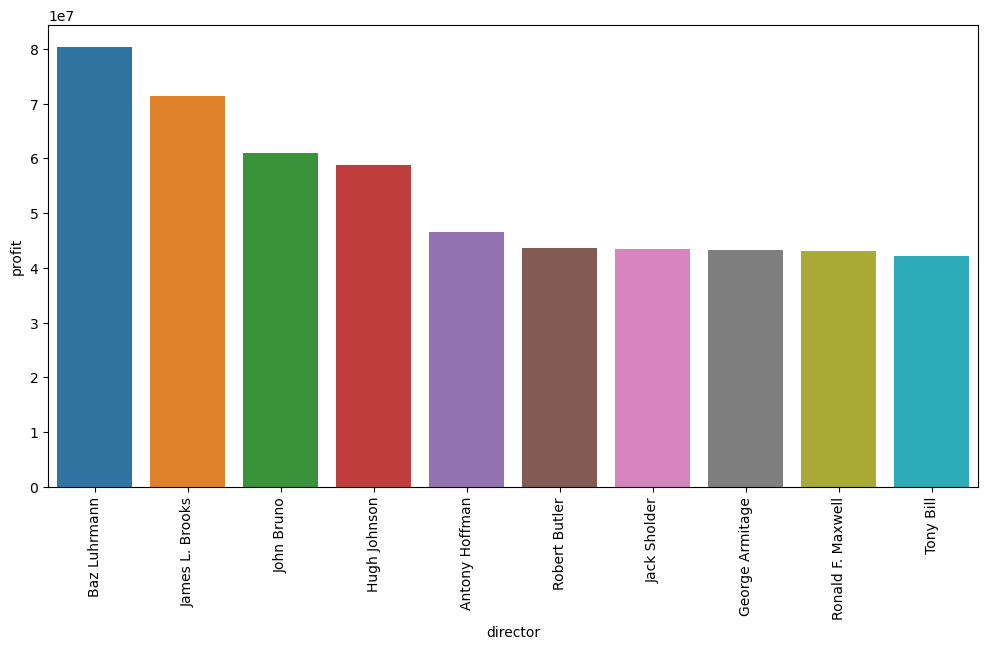

In [199]:
sns.barplot(x=director_data["director"][:10],y=director_data["profit"][:10],data=director_data)

plt.xticks(rotation=90)

plt.show()

Observation:

Baz Luhrmann and James L. Brooks are top 2 directors in terms of mean profit.

# Insights:

1. Most number of movies are produced from USA
2. Top 3 countries having highest mean budgets are Uruguay(23.06%), New Zealand(15.41%), Czech Republic(13.07%)
3. Top 3 genres with highest movies counts are "Drama", "Comedy" and "Action"
4. United States of America has product the most movies which has least loss
5. Family genre movies have most mean popularity among audience.
6. Foreign genre movies have least mean popularity among audience
7. English language has the highest count (92.46%)
8. Heidi Kramer and Alissa Kramer are top 2 actors in terms of mean profit
9. Baz Luhrmann and James L. Brooks are top 2 directors in terms of mean profit